## Tasks

1. Remove useless columns
2. Transform non-numeric values to numeric values 
3. Fix the quantity unbalance in columns (SMOTE)
4. Fix skewness in columns (log transform or power transform)
5. Feature engineering

In [1]:
import pandas as pd 

data = pd.read_csv("../data/fraud.csv")

In [2]:
data.head()

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0


### Remove useless columns

In [3]:
data = data.drop("transaction_id", axis=1)
data.head()

,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,84.47,22,Electronics,0,0,66,3,40,0
1,541.82,3,Travel,1,0,87,1,64,0
2,237.01,17,Grocery,0,0,49,1,61,0
3,164.33,4,Grocery,0,1,72,3,34,0
4,30.53,15,Food,0,0,79,0,44,0


### Transform non-numeric to numeric 

In [4]:
data = pd.get_dummies(data=data, columns=["merchant_category"], drop_first=True, dtype=int)
data.head()

,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud,merchant_category_Electronics,merchant_category_Food,merchant_category_Grocery,merchant_category_Travel
0,84.47,22,0,0,66,3,40,0,1,0,0,0
1,541.82,3,1,0,87,1,64,0,0,0,0,1
2,237.01,17,0,0,49,1,61,0,0,0,1,0
3,164.33,4,0,1,72,3,34,0,0,0,1,0
4,30.53,15,0,0,79,0,44,0,0,1,0,0


### Fixing the skewness between columns

<Axes: xlabel='amount', ylabel='Density'>

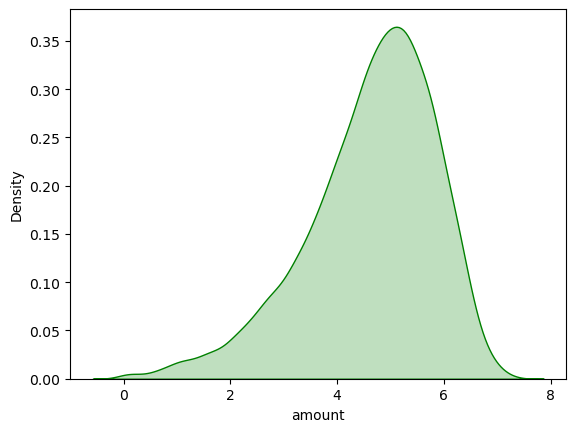

In [5]:
import numpy as np
import seaborn as sns

data["amount"] = np.log1p(data["amount"])
sns.kdeplot(x="amount", data=data, fill=True, color="green")

### Splitting the data



In [6]:
X = data.drop("is_fraud", axis=1)
y = data["is_fraud"]

### Feature engineering

In [7]:
data.head()

,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud,merchant_category_Electronics,merchant_category_Food,merchant_category_Grocery,merchant_category_Travel
0,4.448165,22,0,0,66,3,40,0,1,0,0,0
1,6.296778,3,1,0,87,1,64,0,0,0,0,1
2,5.472313,17,0,0,49,1,61,0,0,0,1,0
3,5.107943,4,0,1,72,3,34,0,0,0,1,0
4,3.450939,15,0,0,79,0,44,0,0,1,0,0


In [8]:
data.device_trust_score.value_counts()

device_trust_score
45    166
52    155
60    155
69    153
49    151
     ... 
35    118
66    117
87    116
47    115
37    115
Name: count, Length: 75, dtype: int64

In [9]:
data.device_trust_score.describe()

count    10000.000000
mean        61.798900
std         21.487053
min         25.000000
25%         43.000000
50%         62.000000
75%         80.000000
max         99.000000
Name: device_trust_score, dtype: float64

In [10]:
bins = [0, 30, 60, 99]
labels = ["Low Security", "Medium Security", "High Security"]

data["security_level"] = pd.cut(data["device_trust_score"], bins=bins, labels=labels)
data.head()

,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud,merchant_category_Electronics,merchant_category_Food,merchant_category_Grocery,merchant_category_Travel,security_level
0,4.448165,22,0,0,66,3,40,0,1,0,0,0,High Security
1,6.296778,3,1,0,87,1,64,0,0,0,0,1,High Security
2,5.472313,17,0,0,49,1,61,0,0,0,1,0,Medium Security
3,5.107943,4,0,1,72,3,34,0,0,0,1,0,High Security
4,3.450939,15,0,0,79,0,44,0,0,1,0,0,High Security


In [11]:
data.velocity_last_24h.unique(), data.velocity_last_24h.describe()

(array([3, 1, 0, 2, 4, 7, 5, 6, 8, 9]),
 count    10000.000000
 mean         2.008900
 std          1.432559
 min          0.000000
 25%          1.000000
 50%          2.000000
 75%          3.000000
 max          9.000000
 Name: velocity_last_24h, dtype: float64)

In [12]:
bins = [-1, 3, 6, 9]
labels = ["Low Transaction", "Medium Transaction", "High Transaction"]

data["transaction_freq"] = pd.cut(data["velocity_last_24h"], labels=labels, bins=bins)
data.head()

,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud,merchant_category_Electronics,merchant_category_Food,merchant_category_Grocery,merchant_category_Travel,security_level,transaction_freq
0,4.448165,22,0,0,66,3,40,0,1,0,0,0,High Security,Low Transaction
1,6.296778,3,1,0,87,1,64,0,0,0,0,1,High Security,Low Transaction
2,5.472313,17,0,0,49,1,61,0,0,0,1,0,Medium Security,Low Transaction
3,5.107943,4,0,1,72,3,34,0,0,0,1,0,High Security,Low Transaction
4,3.450939,15,0,0,79,0,44,0,0,1,0,0,High Security,Low Transaction


In [13]:
data.amount.describe()

count    10000.000000
mean         4.626002
std          1.208247
min          0.000000
25%          3.949415
50%          4.812956
75%          5.495035
max          7.294404
Name: amount, dtype: float64

In [14]:
bins = [-1, 4, 6, 9]
labels = ["Low Amount", "Medium Amount", "High Amount"]

data["amount_type"] = pd.cut(data["amount"], labels=labels, bins=bins)
data.head()

,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud,merchant_category_Electronics,merchant_category_Food,merchant_category_Grocery,merchant_category_Travel,security_level,transaction_freq,amount_type
0,4.448165,22,0,0,66,3,40,0,1,0,0,0,High Security,Low Transaction,Medium Amount
1,6.296778,3,1,0,87,1,64,0,0,0,0,1,High Security,Low Transaction,High Amount
2,5.472313,17,0,0,49,1,61,0,0,0,1,0,Medium Security,Low Transaction,Medium Amount
3,5.107943,4,0,1,72,3,34,0,0,0,1,0,High Security,Low Transaction,Medium Amount
4,3.450939,15,0,0,79,0,44,0,0,1,0,0,High Security,Low Transaction,Low Amount


In [15]:
data.transaction_hour.describe()

count    10000.000000
mean        11.593300
std          6.922708
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: transaction_hour, dtype: float64

In [16]:
bins = [-1, 5, 13, 17, 24]
labels = ["Morning Transaction", "Afternoon Transaction", "Late Afternoon Transaction", "Evening Transaction"]

data["transaction_time"] = pd.cut(data["transaction_hour"], labels=labels, bins=bins)
data.head()

,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud,merchant_category_Electronics,merchant_category_Food,merchant_category_Grocery,merchant_category_Travel,security_level,transaction_freq,amount_type,transaction_time
0,4.448165,22,0,0,66,3,40,0,1,0,0,0,High Security,Low Transaction,Medium Amount,Evening Transaction
1,6.296778,3,1,0,87,1,64,0,0,0,0,1,High Security,Low Transaction,High Amount,Morning Transaction
2,5.472313,17,0,0,49,1,61,0,0,0,1,0,Medium Security,Low Transaction,Medium Amount,Late Afternoon Transaction
3,5.107943,4,0,1,72,3,34,0,0,0,1,0,High Security,Low Transaction,Medium Amount,Morning Transaction
4,3.450939,15,0,0,79,0,44,0,0,1,0,0,High Security,Low Transaction,Low Amount,Late Afternoon Transaction


### Turn non-numeric values to numeric (after future engineering)

In [17]:
data = pd.get_dummies(data, columns=["security_level"], drop_first=True, dtype=int)
data = pd.get_dummies(data, columns=["transaction_freq"], drop_first=True, dtype=int)
data = pd.get_dummies(data, columns=["amount_type"], drop_first=True, dtype=int)
data = pd.get_dummies(data, columns=["transaction_time"], drop_first=True, dtype=int)

data.head()

,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud,merchant_category_Electronics,merchant_category_Food,...,merchant_category_Travel,security_level_Medium Security,security_level_High Security,transaction_freq_Medium Transaction,transaction_freq_High Transaction,amount_type_Medium Amount,amount_type_High Amount,transaction_time_Afternoon Transaction,transaction_time_Late Afternoon Transaction,transaction_time_Evening Transaction
0,4.448165,22,0,0,66,3,40,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1,6.296778,3,1,0,87,1,64,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,5.472313,17,0,0,49,1,61,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,5.107943,4,0,1,72,3,34,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,3.450939,15,0,0,79,0,44,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [18]:
data.to_csv("processed_data.csv", index=False)